# Mean shift Clustering

Dorin Comaniciu and Peter Meer, “Mean Shift: A robust approach toward feature space analysis”. IEEE Transactions on Pattern Analysis and Machine Intelligence. 2002. pp. 603-619.

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

## Generate some data

Generate some data.  We use sklearn.datasets.samples_generator to get some data to play with

In [2]:
centers = [[1, 1], [-2, -1], [1, -1]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)

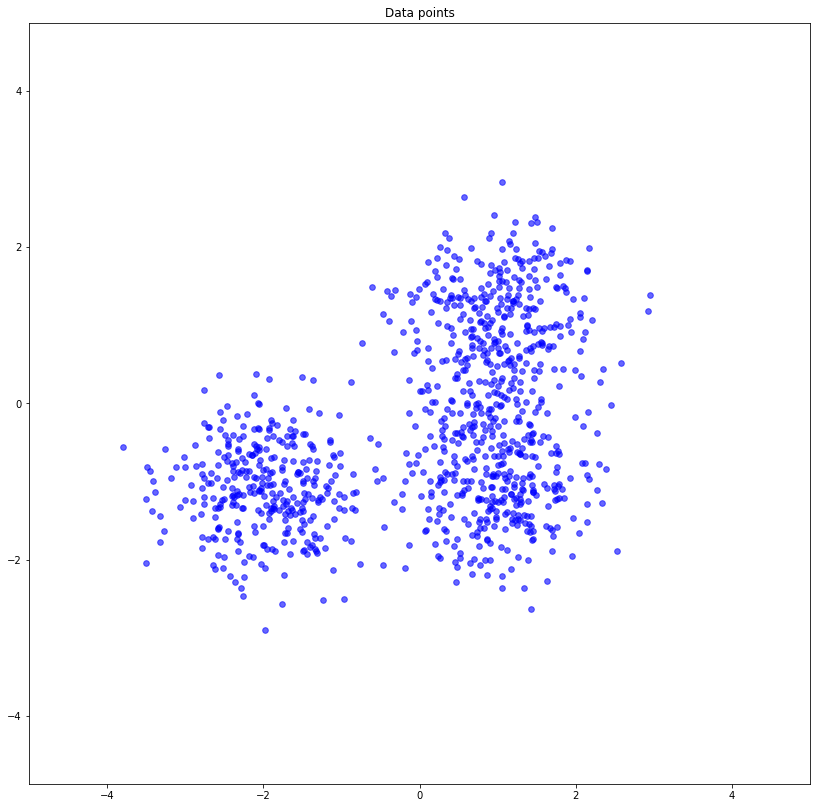

In [3]:
plt.figure(figsize=(14,14))
ax = plt.subplot(111)
ax.scatter(X[:,0], X[:,1], marker='o', s=32, c='b', alpha=.6)
ax.axis('equal')
ax.axis([-5,5,-5,5])
plt.title('Data points')
plt.show()

## Perform Mean Shift Clustering

Use sklearn.cluster.MeanShift method to perform clustering

In [4]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


# Visualize clustering

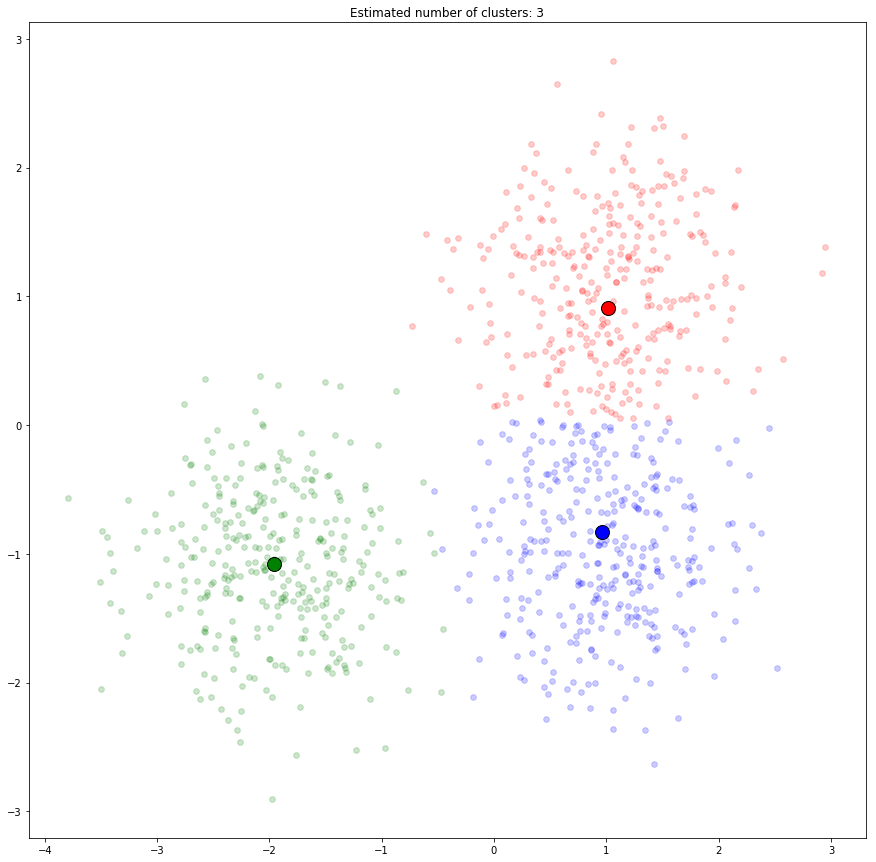

In [5]:
from itertools import cycle

plt.figure(figsize=(15,15))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, s=32, alpha=.2)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()